# Python3 program change RGB Color 
### Model to HSV Color Model 

def rgb_to_hsv(r, g, b): 

	# R, G, B values are divided by 255 
	# to change the range from 0..255 to 0..1: 
	r, g, b = r / 255.0, g / 255.0, b / 255.0

	# h, s, v = hue, saturation, value 
	cmax = max(r, g, b) # maximum of r, g, b 
	cmin = min(r, g, b) # minimum of r, g, b 
	diff = cmax-cmin	 # diff of cmax and cmin. 

	# if cmax and cmax are equal then h = 0 
	if cmax == cmin: 
		h = 0
	
	# if cmax equal r then compute h 
	elif cmax == r: 
		h = (60 * ((g - b) / diff) + 360) % 360

	# if cmax equal g then compute h 
	elif cmax == g: 
		h = (60 * ((b - r) / diff) + 120) % 360

	# if cmax equal b then compute h 
	elif cmax == b: 
		h = (60 * ((r - g) / diff) + 240) % 360

	# if cmax equal zero 
	if cmax == 0: 
		s = 0
	else: 
		s = (diff / cmax) * 100

	# compute v 
	v = cmax * 100
	return h, s, v 


print(rgb_to_hsv(45, 215, 0)) 
print(rgb_to_hsv(31, 52, 29)) 

print(rgb_to_hsv(129, 88, 47)) 
'''

In [1]:
#!pip install opencv-python

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
img = cv2.imread("E:/Study Stuff/DataScience/Python/GoogleDrive's__data/00_Resources/ocean.jpeg")

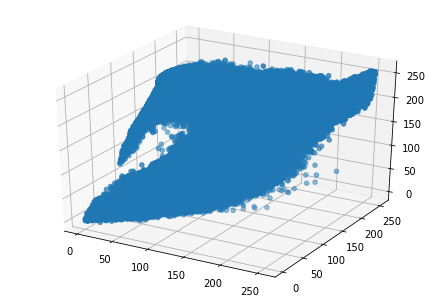

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()
#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
original_image = cv2.imread("E:/Study Stuff/DataScience/Python/GoogleDrive's__data/00_Resources/ocean.jpeg")

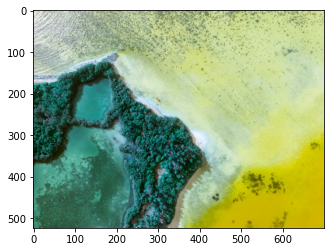

In [6]:
plt.imshow(original_image);

## Why do we convert from RGB to HSV

the basic summary is that HSV is better for object detection,

OpenCV usually captures images and videos in 8-bit, unsigned integer, BGR format.
In other words, captured images can be considered as 3 matrices, BLUE,RED and GREEN with integer values ranges from 0 to 255

How BGR image is formed In the above image, each small box represents a pixel of the image.
In real images, these pixels are so small that human eye cannot differentiate.

Usually, one can think that BGR color space is more suitable for color based segmentation.
But HSV color space is the most suitable color space for color based image segmentation.
So, in the above application, I have converted the color space of original image of the video from BGR to HSV image.

HSV color space is consists of 3 matrices, 'hue', 'saturation' and 'value'.
In OpenCV, value range for 'hue', 'saturation' and 'value' are respectively 0-179, 0-255 and 0-255.
'Hue' represents the color, 'saturation' represents the amount to which that 
respective color is mixed with white and 'value' represents the amount to which that respective color is mixed with black.

In [7]:
img = cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB) # render image's color same as original image has 
img

array([[[168, 164, 165],
        [222, 218, 219],
        [210, 206, 207],
        ...,
        [183, 243, 233],
        [167, 224, 215],
        [168, 225, 216]],

       [[233, 231, 232],
        [234, 232, 233],
        [224, 222, 223],
        ...,
        [157, 217, 207],
        [174, 234, 224],
        [159, 219, 209]],

       [[240, 240, 240],
        [245, 245, 245],
        [237, 237, 237],
        ...,
        [154, 216, 205],
        [179, 241, 230],
        [157, 219, 208]],

       ...,

       [[106, 135,  51],
        [104, 133,  49],
        [105, 132,  53],
        ...,
        [  1, 180, 210],
        [  0, 181, 210],
        [  1, 182, 211]],

       [[107, 136,  52],
        [105, 134,  50],
        [106, 133,  54],
        ...,
        [  0, 179, 209],
        [  0, 181, 210],
        [  1, 182, 211]],

       [[107, 136,  52],
        [106, 135,  51],
        [107, 134,  55],
        ...,
        [  0, 179, 209],
        [  0, 181, 210],
        [  2, 183, 212]]

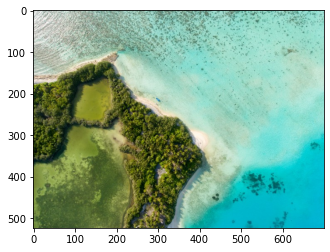

In [8]:
plt.imshow(img);

In [9]:
vectorized = img.reshape((-1,3))
vectorized

array([[168, 164, 165],
       [222, 218, 219],
       [210, 206, 207],
       ...,
       [  0, 179, 209],
       [  0, 181, 210],
       [  2, 183, 212]], dtype=uint8)

#### We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.

In [10]:
vectorized = np.float32(vectorized)
vectorized

array([[168., 164., 165.],
       [222., 218., 219.],
       [210., 206., 207.],
       ...,
       [  0., 179., 209.],
       [  0., 181., 210.],
       [  2., 183., 212.]], dtype=float32)

We are going to cluster with k = 3 because if you look at the image above it has 3 colors,
green-colored grass and forest, blue sea and the greenish-blue seashore.

In [11]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [12]:
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
print(ret,'\n\n',label,'\n\n',center)

913795239.3727849 

 [[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]] 

 [[ 84.08678    98.250275   44.17588  ]
 [160.0944    209.26521   190.27567  ]
 [  7.3115454 183.26581   193.5178   ]]


In [13]:
center = np.uint8(center)
center

array([[ 84,  98,  44],
       [160, 209, 190],
       [  7, 183, 193]], dtype=uint8)

Next, we have to access the labels to regenerate the clustered image

In [14]:
res = center[label.flatten()]
print(res,'\n\n\n\n')
result_image = res.reshape((img.shape))
print(result_image)

[[160 209 190]
 [160 209 190]
 [160 209 190]
 ...
 [  7 183 193]
 [  7 183 193]
 [  7 183 193]] 




[[[160 209 190]
  [160 209 190]
  [160 209 190]
  ...
  [160 209 190]
  [160 209 190]
  [160 209 190]]

 [[160 209 190]
  [160 209 190]
  [160 209 190]
  ...
  [160 209 190]
  [160 209 190]
  [160 209 190]]

 [[160 209 190]
  [160 209 190]
  [160 209 190]
  ...
  [160 209 190]
  [160 209 190]
  [160 209 190]]

 ...

 [[ 84  98  44]
  [ 84  98  44]
  [ 84  98  44]
  ...
  [  7 183 193]
  [  7 183 193]
  [  7 183 193]]

 [[ 84  98  44]
  [ 84  98  44]
  [ 84  98  44]
  ...
  [  7 183 193]
  [  7 183 193]
  [  7 183 193]]

 [[ 84  98  44]
  [ 84  98  44]
  [ 84  98  44]
  ...
  [  7 183 193]
  [  7 183 193]
  [  7 183 193]]]


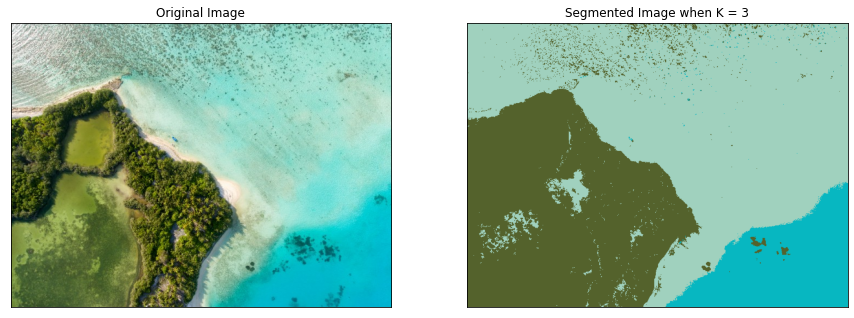

In [15]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

* as we increase number of clusters, clustred image is more clear

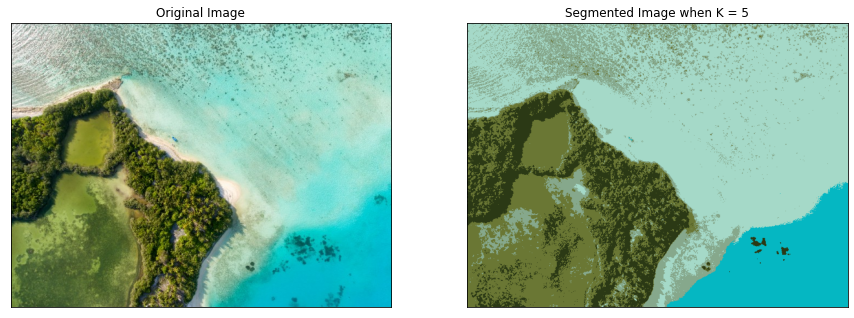

In [16]:
K = 5
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

* Canny Edge detection: It is an image processing method used to detect edges in an image while suppressing noise

## The Canny Edge detection algorithm is composed of 5 steps:

* Gradient calculation
* Non-maximum suppression
* Double threshold
* Edge Tracking by Hysteresis
### OpenCV provides cv2.Canny(image, threshold1,threshold2) function for edge detection.

The first argument is our input image. Second and third arguments are our min and max threshold respectively.

The function finds edges in the input image(8-bit input image) and marks them in the output map edges using the Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The largest value is used to find initial segments of strong edges.

In [21]:
img = cv2.imread("E:/Study Stuff/couplePic.png")

In [22]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

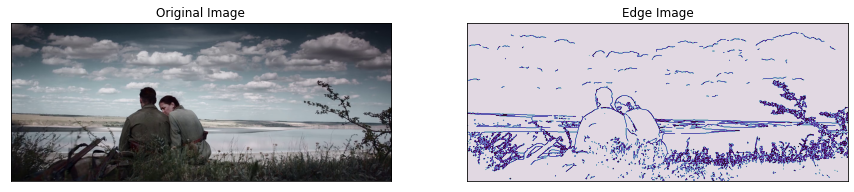

In [23]:
edges = cv2.Canny(img,150,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image') 
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(edges,cmap = 'twilight')
plt.title('Edge Image')
plt.xticks([])
plt.yticks([])
plt.show()